In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy import interp
import statistics 
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from statistics import mean 
import statsmodels.api as sms

from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import log_loss

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import LeaveOneOut 

from imblearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from imblearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier

from functools import reduce
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN 
import itertools
import copy

import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

np.random.seed(100)

C:\Users\zhezh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\zhezh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zhezh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zhezh\Anaconda3\lib\site-packages\tensorflow\python\framework\

In [147]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [149]:
df = pd.read_csv('Diabetes Data.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

Anemia       BMI       HDL       LDL  Pesticide Use       Age  Alcohol Use  \
0     0.0 -1.624450  1.814557 -0.288805            0.0  1.399115    -1.061516   
1     0.0  1.183858  0.284185 -0.416550            0.0  0.729447    -0.368968   
2     0.0 -1.482733  2.334568 -1.368495            0.0 -1.223751    -0.368968   
3     0.0  0.185727 -1.582470  0.282361            0.0 -0.888917     5.863966   
4     0.0  1.210246  0.082563  1.553668            0.0 -0.554083    -0.715242   

   Diabetes  Exercise  Fasting Glucose  Gender   Insulin  Leg Length  \
0       0.0       1.0         0.377156     0.0 -0.609034   -0.707749   
1       0.0       1.0         0.574394     0.0  0.738345   -0.482506   
2       0.0       1.0        -0.942001     0.0 -1.310343   -1.242701   
3       0.0       0.0         0.173088     1.0  0.859224   -0.651438   
4       0.0       0.0         0.104585     0.0  0.267108    0.334000   

   Waist Size     sysBP     diaBP  BMI_NaN  Fasting glucose_NaN  LDL_NaN  \
0    0.038071  1.063572  1.629503        0                    0        0   
1    0.910079  0.136431  1.140194        0                    0        0   
2   -1.627452 -1.166274 -0.581881        0                    0        0   
3    0.171391 -0.089730  0.673673        0                    0        0   
4    0.677529  0.035110 -0.030858        0                    0        0   

   HDL_NaN  Insulin_NaN  SysBP_NaN  DiaBP_NaN  Alcohol Use_NaN  \
0        0            0          0          0                0   
1        0            0          0          0                0   
2        0            0          0          0                0   
3        0            0          0          0                0   
4        0            0          1          1                0   

   Mexican American  Hispanic  White  Black  Asian  Other Race  
0                 0         0      1      0      0           0  
1                 0         0      1      0      0           0  
2                 0         0      1      0      0           0  
3                 1         0      0      0      0           0  
4                 0         0      0      1      0           0

#### Data Visualization with Autoviz library

Shape of your Data Set: (4382, 30)
Classifying variables in data set...
    29 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Total Number of Scatter Plots = 55
Number of Cat and Continuous Vars exceeds 35, hence no Pivot or Bar Charts
Time to run AutoViz (in seconds) = 38.411


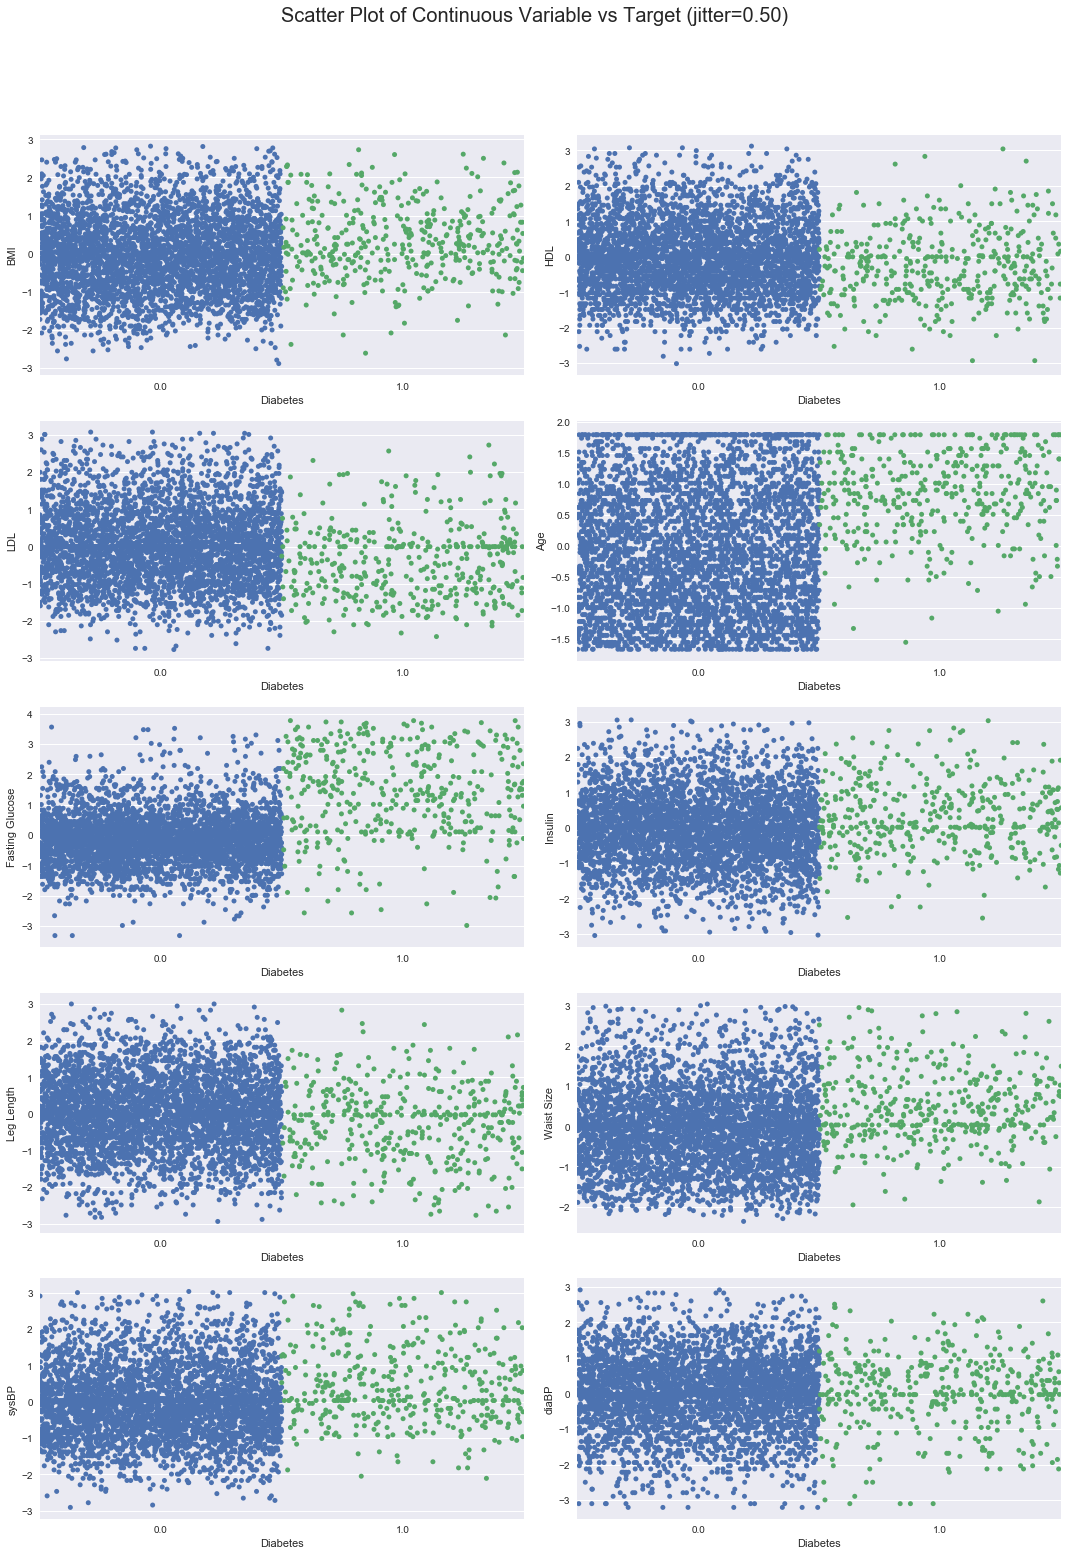

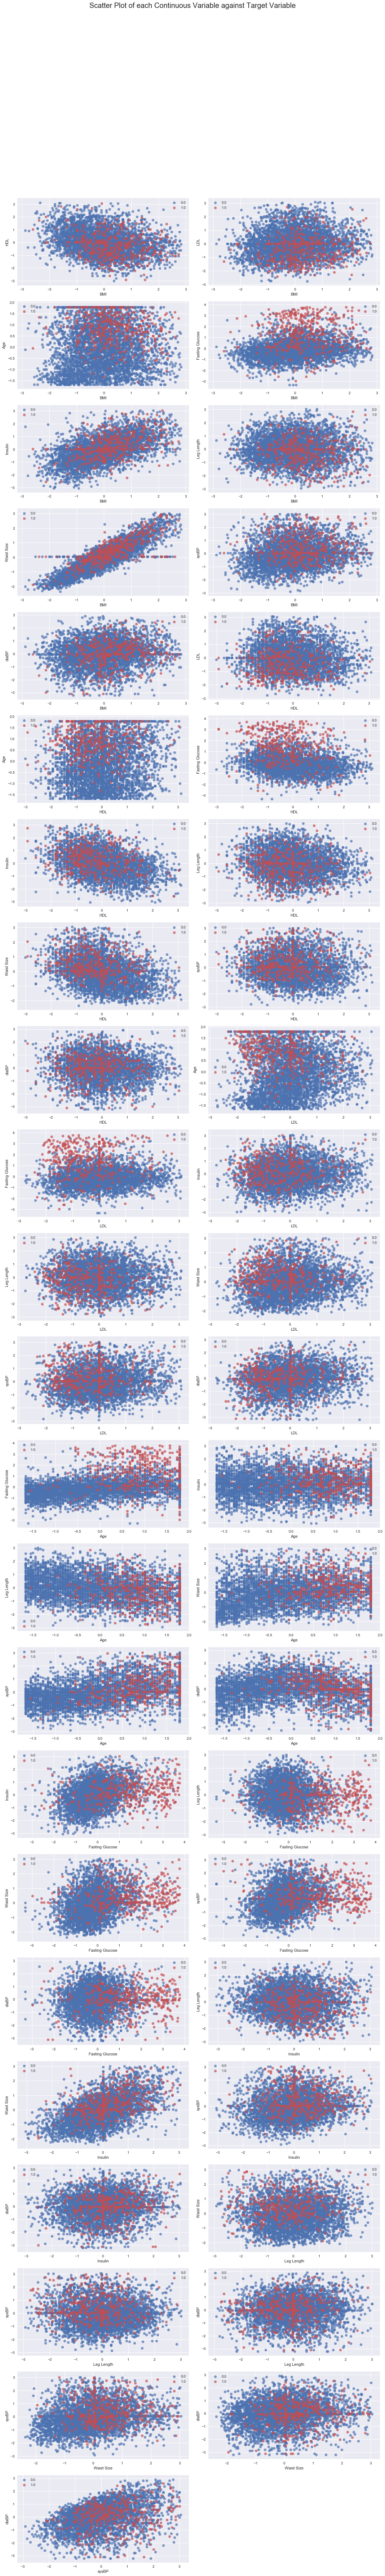

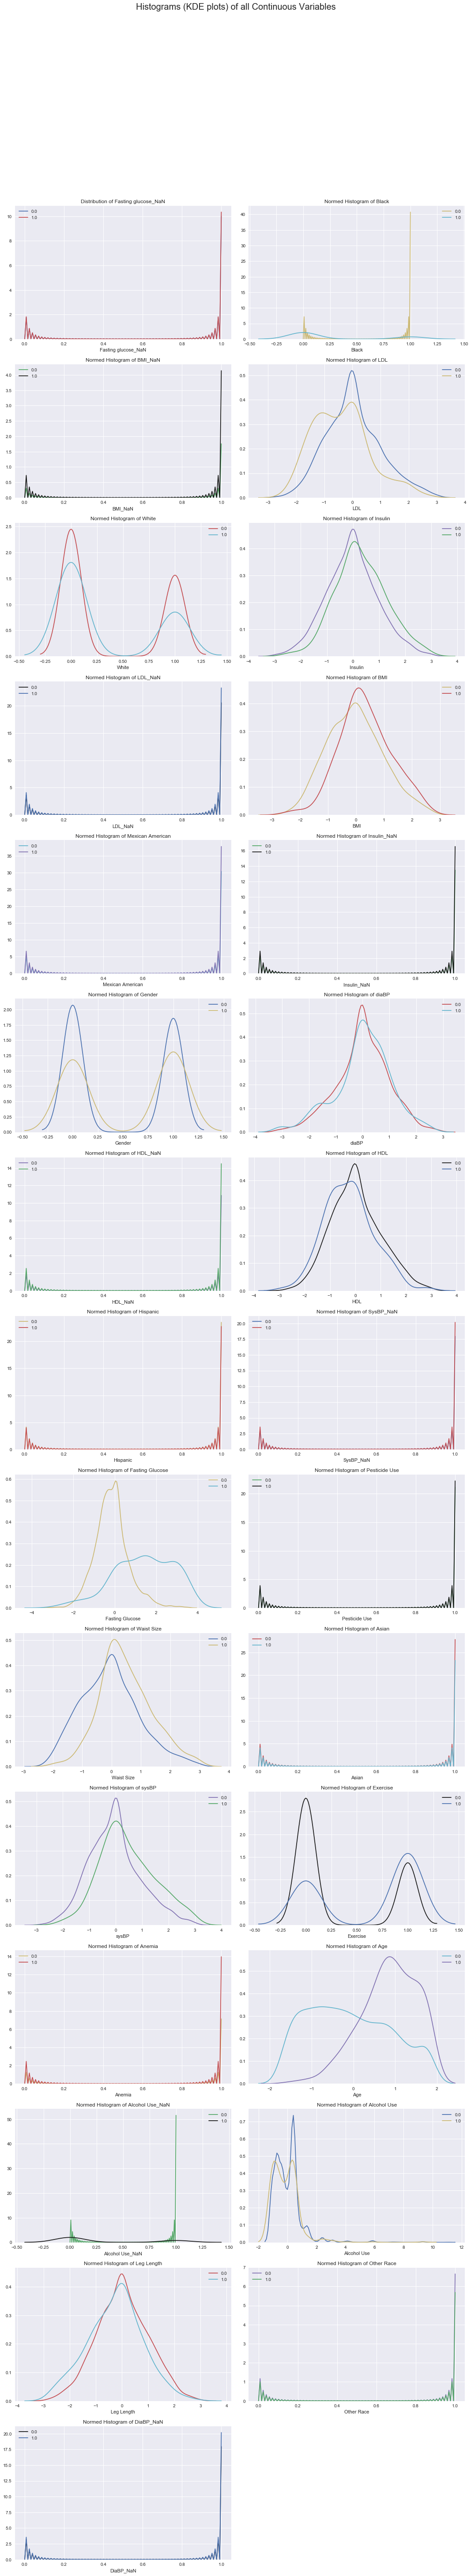

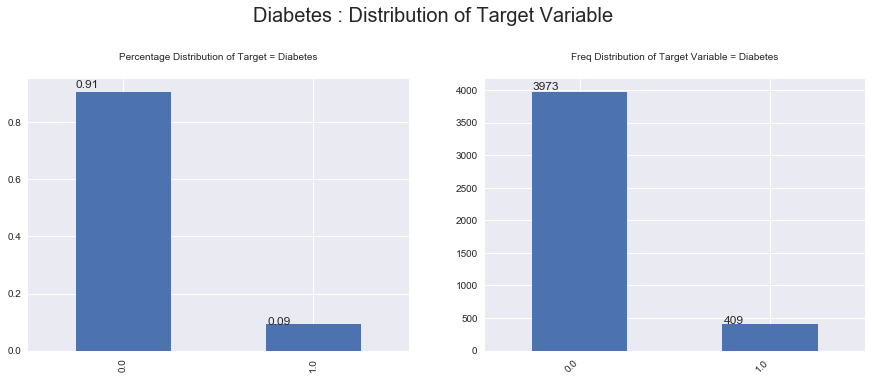

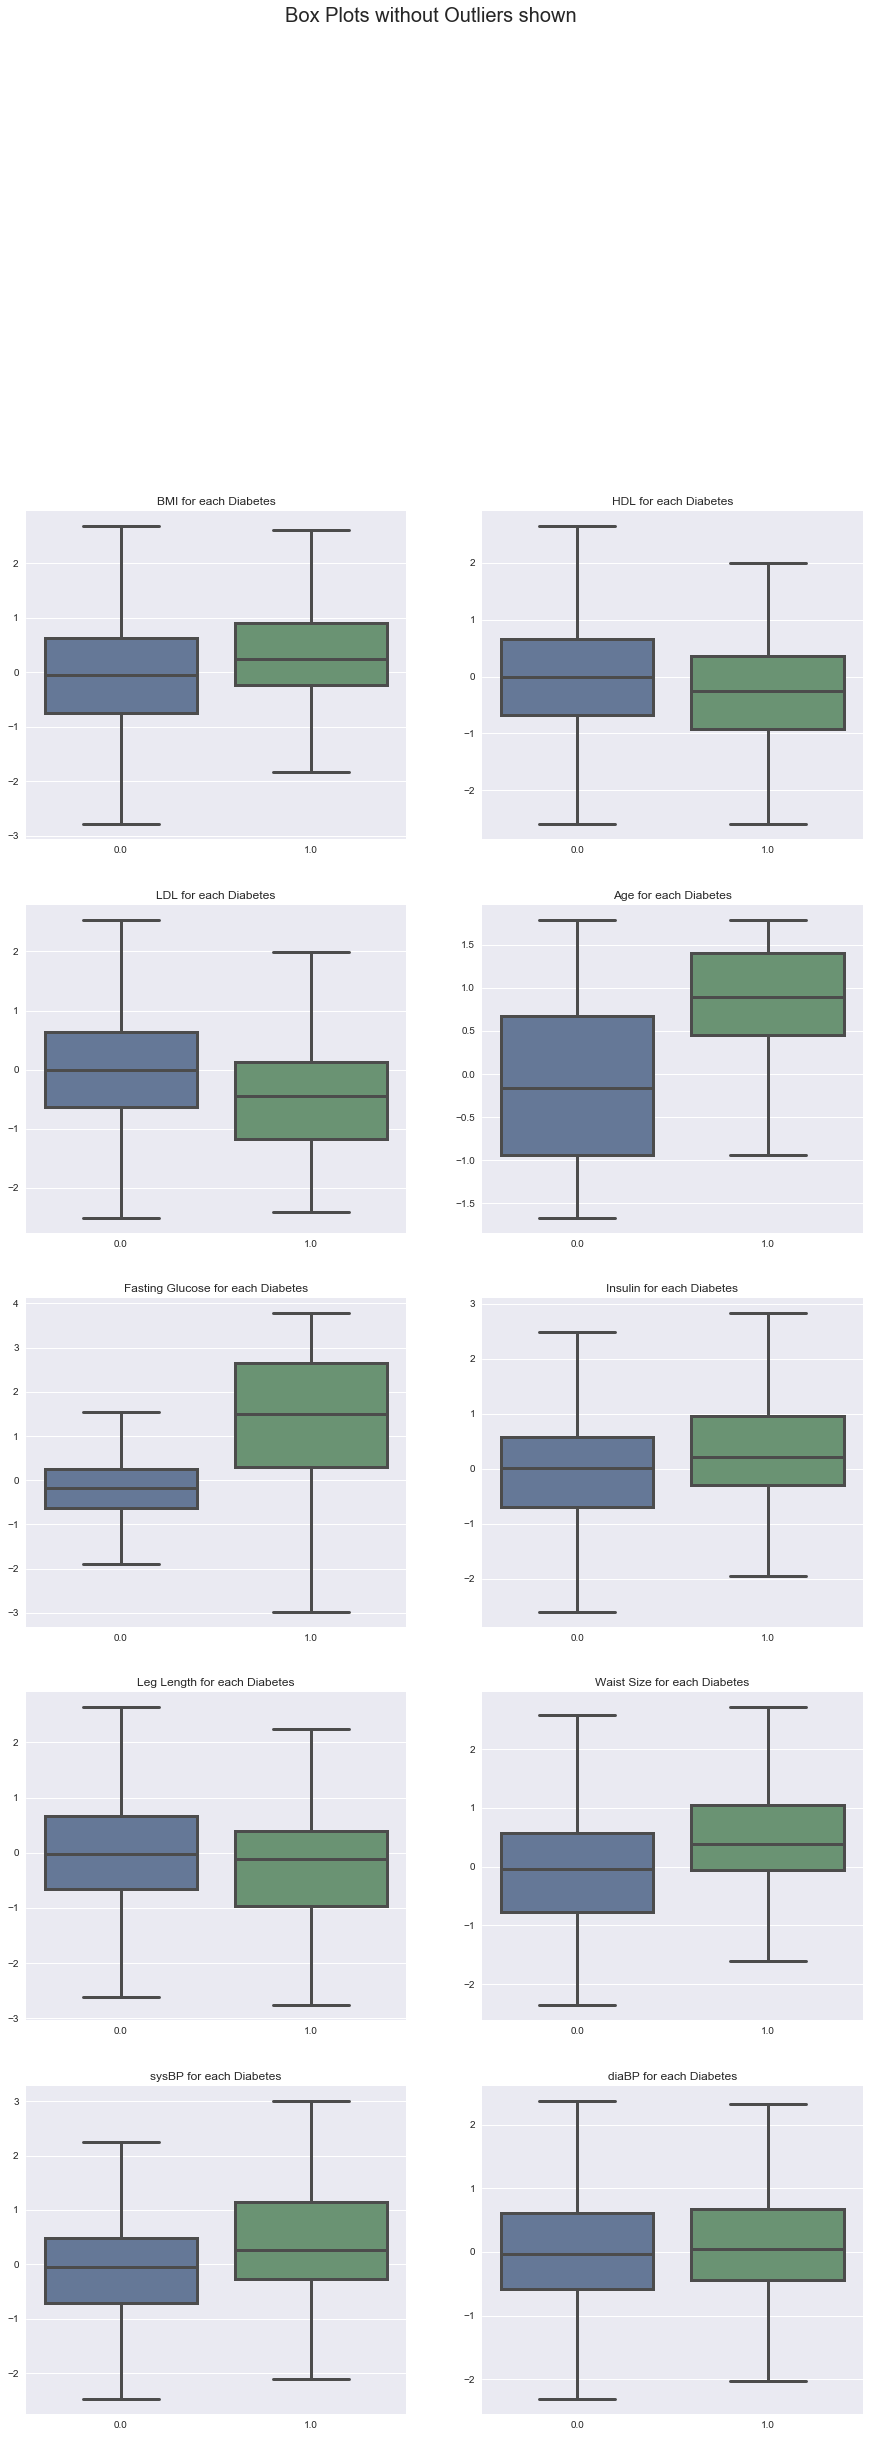

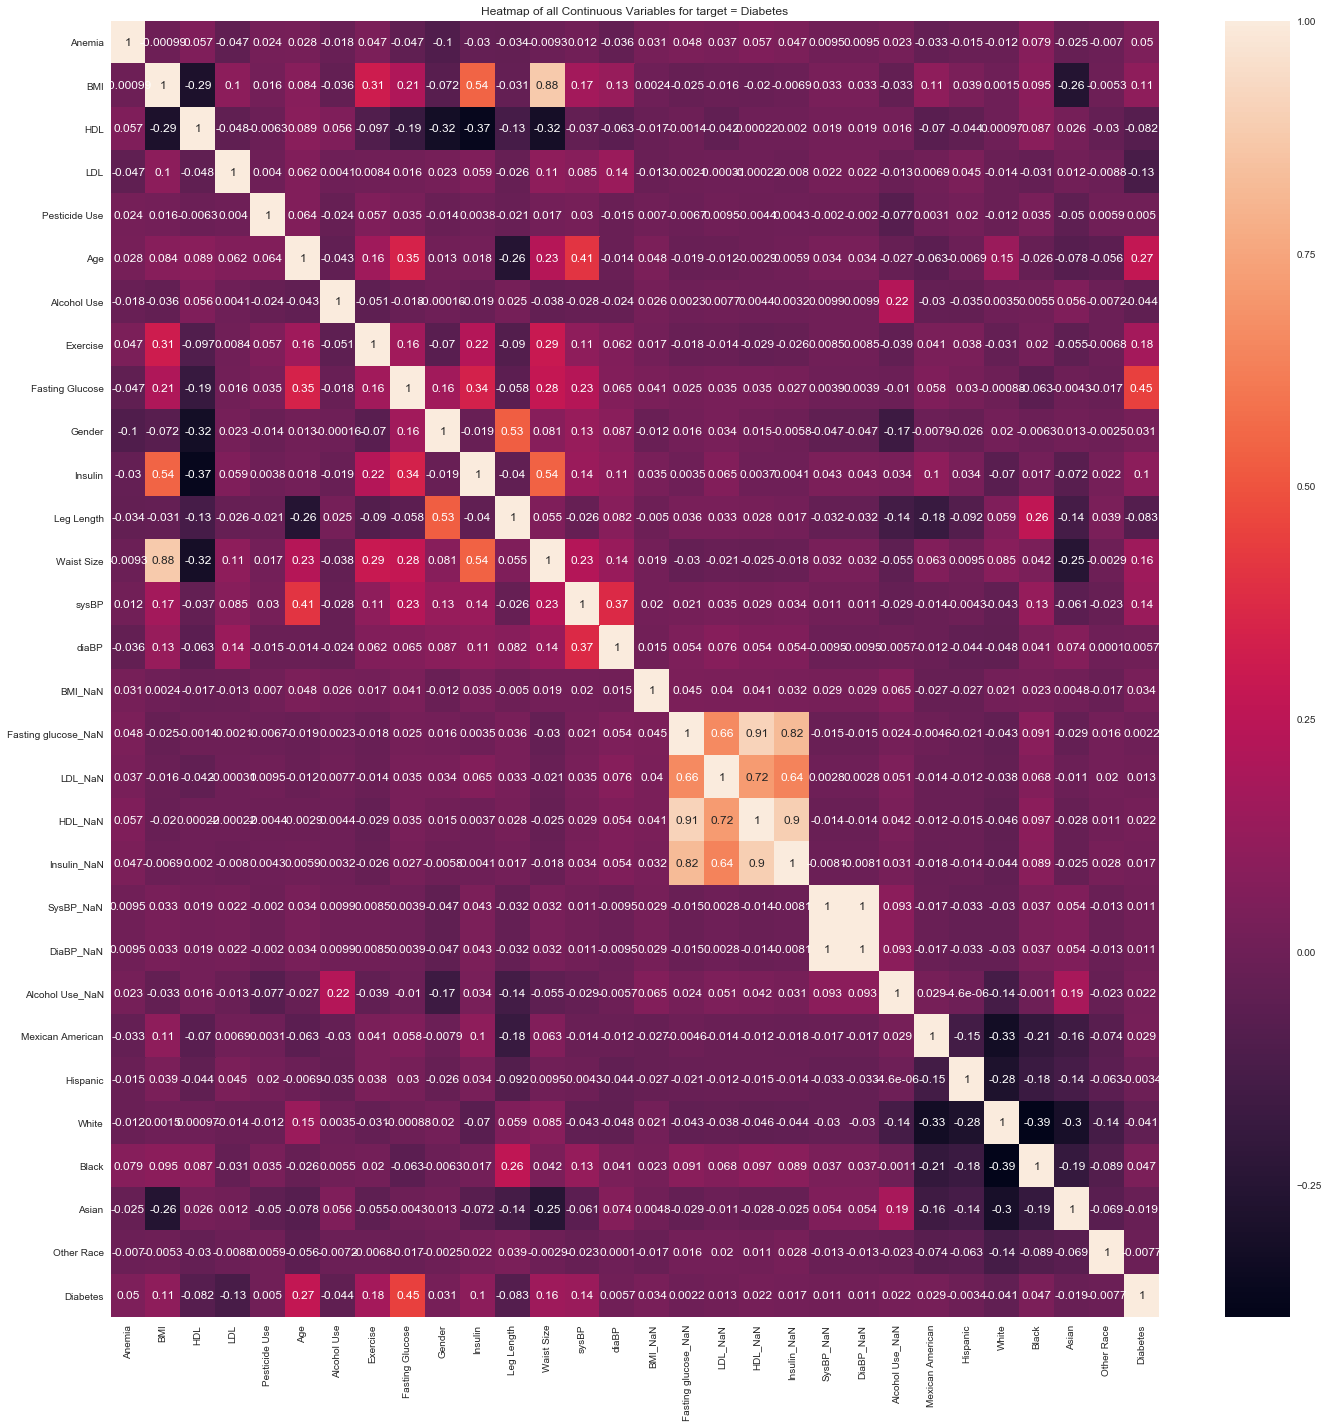

In [150]:
sep = ','
dft = AV.AutoViz(filename="",sep=sep, depVar='Diabetes', dfte=df, header=0, verbose=2, 
                 lowess=False, chart_format='svg', max_rows_analyzed=10000, max_cols_analyzed=35)

In [3]:
y = df['Diabetes']
X = df.drop(['Diabetes'],axis = 1)
X_names = df.drop(['Diabetes'],axis = 1).columns.tolist()
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state = 2)


In [4]:
numerical_variables = ['BMI','HDL','LDL','Age','Alcohol Use','Fasting Glucose','Insulin','sysBP','diaBP',
                       'Leg Length','Waist Size']
categorical_variables = ['Mexican American','Hispanic','White','Black','Asian','Other Race',
                          'BMI_NaN','Fasting glucose_NaN','LDL_NaN','HDL_NaN','Insulin_NaN',
                          'SysBP_NaN','DiaBP_NaN','Alcohol Use_NaN',
                         'Gender', 'Exercise', 'Pesticide Use','Anemia']
feature_list = numerical_variables + categorical_variables
len(feature_list)


29

In [5]:
def plot_confusion_matrix(y_val, y_val_predictions):
    cm = metrics.confusion_matrix(y_val, y_val_predictions)

    class_names=[0,1] 
    plt.figure(figsize=(5,3))
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [6]:
# Create a series with feature importances:
def feature_importance(clf,X_names):
    featimp = pd.Series(clf.feature_importances_,index=X_names).sort_values(ascending=False)
    print('feature importance')
    print(featimp)
    plt.figure(figsize=(10,5))
    sns.set(font_scale=0.9)
    sns.barplot(x=featimp, y=featimp.index,dodge=False)
    plt.xlabel('Feature Importance Score',fontsize = 13)
    plt.ylabel('Features',fontsize = 13)
    plt.title("Feature Importance",fontsize = 13)
    plt.show()
    return featimp


In [7]:
##### RUN THIS CELL WILL CLEAR OUT model_results!!!!!!!! #####
model_results = pd.DataFrame(columns=['Name', 'Accuracy', 'Recall', 'Precision', 'F1','Roc Auc'])

In [8]:
best_clf_probabilities = {}

def add_results(clf_name,accuracy,recall,precision,f1,roc_auc):
    global model_results        
    new_row = pd.DataFrame([[clf_name, accuracy, precision, recall, f1, roc_auc]], columns=model_results.columns)
    model_results = model_results.append(new_row, ignore_index=True)
    model_results = model_results.sort_values(by=['Name'])

    
def fit_and_predict(clf, clf_name, X_train, y_train, X_val, y_val):    
    
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    roc_auc = roc_auc_score(y_val, y_val_pred)
    
    
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    
    add_results(clf_name,accuracy,recall,precision,f1,roc_auc)
    
    if 'Best' in clf_name:
#         plot_roc(y_val,y_val_pred,clf,X_val)
        plot_confusion_matrix(y_val, y_val_pred)
        probability = clf.predict_proba(X_val)[:, 1]
        best_clf_probabilities[clf_name] = probability
    
    return clf


In [9]:
def hyperparameters(clf, method, grid):
    
    if method == 'random':
        clf_search = RandomizedSearchCV(clf, param_distributions = grid,scoring = 'roc_auc', verbose=2, random_state=42, n_jobs = -1)
    elif method == 'gridsearch':
        clf_search = GridSearchCV(clf, param_grid = grid, n_jobs = -1,scoring = 'roc_auc', refit = True)
    else: 
        print('not included')
    
    return clf_search


### steps:
1. A search through all candidate models, and pick the best ones to tune
2. For the good baseline models selected from step 1, do feature selection
3. Based on the result of step 2, do hyperparameter tuning

In [10]:
# step 1:
# Compare baseline models

clf_list = [
    ('Random Forest', RandomForestClassifier(random_state=0)),
    ('SVC', SVC(random_state=0)),
    ('Logistic Regression', LogisticRegression(random_state=0)),
    ('KNN', KNeighborsClassifier()),
    ('XGBoost', XGBClassifier(random_state=0)),
]

sm = SMOTE(random_state=42)

for clf_name, clf in clf_list:
    print(clf_name)
    baseline_pipeline = Pipeline([('sm', sm),
                                  ('clf', clf)])
    fit_and_predict(baseline_pipeline, clf_name, X_train.values, y_train.values, X_val.values, y_val.values)

Random Forest
SVC
Logistic Regression
KNN
XGBoost


In [11]:
model_results

Name  Accuracy    Recall  Precision        F1   Roc Auc
0                  KNN  0.817404  0.301282   0.712121  0.423423  0.770234
1  Logistic Regression  0.827389  0.329193   0.803030  0.466960  0.816476
2        Random Forest  0.925820  0.640000   0.484848  0.551724  0.728251
3                  SVC  0.851641  0.360294   0.742424  0.485149  0.802708
4              XGBoost  0.915835  0.547945   0.606061  0.575540  0.777046

### baseline results

In [176]:
model_results = model_results.sort_values(by=['Roc Auc'],ascending=False)
model_results

Name  Accuracy    Recall  Precision  \
5          knn: be_features + grid search 300  0.867332  0.401460   0.833333   
34   rf: Feature importance + random search 1  0.878745  0.424000   0.803030   
45                          svc: xgb_features  0.853067  0.374150   0.833333   
51                    xgb: Feature importance  0.900143  0.481132   0.772727   
53  xgb: Feature importance + random search 2  0.857347  0.380282   0.818182   
52  xgb: Feature importance + random search 1  0.857347  0.380282   0.818182   
35   rf: Feature importance + random search 2  0.868759  0.401515   0.803030   
47        svc: xgb_features + random search 2  0.824536  0.331361   0.848485   
21                          lr:  xgb_features  0.815977  0.320000   0.848485   
28           lr: xgb features + grid search 1  0.815977  0.320000   0.848485   
27           lr: xgb features + grid search 1  0.815977  0.320000   0.848485   
42                  svc: chi_kendall_features  0.861626  0.385185   0.787879   
41                    svc: chi_anova_features  0.861626  0.385185   0.787879   
40                           svc: be_features  0.858773  0.379562   0.787879   
25                                  lr: RFE 5  0.820257  0.323529   0.833333   
4                            knn: be_features  0.841655  0.350993   0.803030   
3                            knn: be_features  0.841655  0.350993   0.803030   
18                  lr:  chi_kendall_features  0.828816  0.333333   0.818182   
17                    lr:  chi_anova_features  0.828816  0.333333   0.818182   
24                           lr: Best on test  0.786773  0.284553   0.864198   
23                       lr: Baseline on test  0.822121  0.318841   0.814815   
38                          svc: Best on test  0.810718  0.305936   0.827160   
19                           lr:  rf_features  0.828816  0.331250   0.803030   
16                           lr:  be_features  0.828816  0.331250   0.803030   
26                                  lr: lasso  0.827389  0.329193   0.803030   
22                               lr: Baseline  0.827389  0.329193   0.803030   
20                          lr:  vif_features  0.825963  0.327160   0.803030   
39                                  svc: RFE9  0.825963  0.327160   0.803030   
46        svc: xgb_features + random search 1  0.734665  0.250000   0.909091   
8                   knn: chi_kendall_features  0.843081  0.349315   0.772727   
6                     knn: chi_anova_features  0.843081  0.349315   0.772727   
9                   knn: chi_kendall_features  0.843081  0.349315   0.772727   
7                     knn: chi_anova_features  0.843081  0.349315   0.772727   
50                          xgb: Best on test  0.826682  0.321608   0.790123   
36                              svc: Baseline  0.851641  0.360294   0.742424   
37                      svc: Baseline on test  0.851767  0.355030   0.740741   
43                           svc: rf_features  0.848787  0.355072   0.742424   
15                          knn: xgb_features  0.834522  0.333333   0.757576   
14                          knn: xgb_features  0.834522  0.333333   0.757576   
44                          svc: vif_features  0.854494  0.363636   0.727273   
2                           knn: Best on test  0.833523  0.326203   0.753086   
13                          knn: vif_features  0.825963  0.320513   0.757576   
12                          knn: vif_features  0.825963  0.320513   0.757576   
33                     rf: Feature importance  0.920114  0.567568   0.636364   
32                     rf: Feature importance  0.920114  0.567568   0.636364   
10                           knn: rf_features  0.854494  0.361538   0.712121   
11                           knn: rf_features  0.854494  0.361538   0.712121   
31                           rf: Best on test  0.841505  0.331395   0.703704   
48                              xgb: Baseline  0.915835  0.547945   0.606061   
1                               knn: Base

In [177]:
# clear baseline results
model_results = pd.DataFrame(columns=['Name', 'Accuracy', 'Recall', 'Precision', 'F1','Roc Auc'])

#### Attempt 1: random forest

In [178]:
sm = SMOTE(random_state=42)
rf = RandomForestClassifier(random_state=0,n_jobs=-1)

pipeline1 = Pipeline([('sm', sm), 
                      ('rf', rf)])

rf1 = fit_and_predict(pipeline1, 'rf: Baseline', X_train, y_train, X_val, y_val)

feature importance
Fasting Glucose        0.197765
Age                    0.174828
Exercise               0.094001
LDL                    0.057734
Waist Size             0.055642
sysBP                  0.042533
Leg Length             0.038202
diaBP                  0.037104
White                  0.035871
Alcohol Use            0.033960
HDL                    0.033939
Insulin                0.030791
BMI                    0.027935
Mexican American       0.021282
Gender                 0.018158
Alcohol Use_NaN        0.016488
Hispanic               0.013073
Black                  0.012896
Pesticide Use          0.011155
Anemia                 0.008799
Asian                  0.008153
DiaBP_NaN              0.006921
SysBP_NaN              0.006515
LDL_NaN                0.005776
Insulin_NaN            0.004997
Fasting glucose_NaN    0.002438
HDL_NaN                0.001438
BMI_NaN                0.000988
Other Race             0.000620
dtype: float64


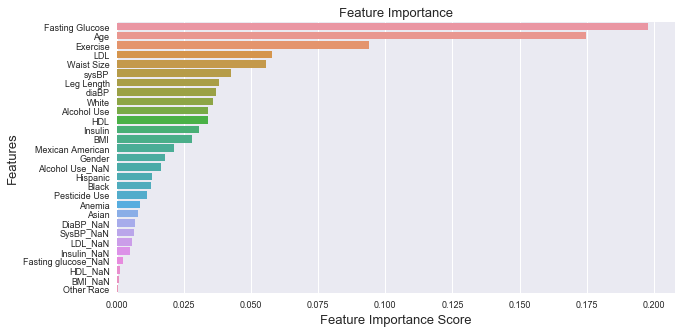

In [179]:
featimp = feature_importance(rf1[1],X_names)

In [180]:
# highest roc_auc at threshold = 0.04
# thresholds = [0,0.0001,0.001,0.005,0.01,0.02,0.03,0.035,0.04,0.05,0.1]
threshold = 0.04
sfm = SelectFromModel(RandomForestClassifier(random_state=0), threshold=threshold)
pipeline2 = Pipeline([('sm', sm), 
                      ('sfm', sfm),
                      ('rf', rf)])

rf2 = fit_and_predict(pipeline2, 'rf: Feature importance', X_train, y_train, X_val, y_val)

In [181]:
chosen_feature_indices = rf2[1].get_support(indices=True)
rf_features = [X_names[i] for i in chosen_feature_indices]
rf_features

['LDL', 'Age', 'Exercise', 'Fasting Glucose', 'Waist Size', 'sysBP']

In [182]:
# grid 1
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 105, num = 10)]
max_features = ['sqrt','log2',None]
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
min_samples_split = [10,20,30,40,50]
min_samples_leaf = [10,20,30,40,50] 
bootstrap = [True]

rf_grid =  {'rf__bootstrap': bootstrap,
            'rf__max_depth': max_depth,
            'rf__max_features': max_features,
            'rf__min_samples_leaf': min_samples_leaf,
            'rf__min_samples_split': min_samples_split,
            'rf__n_estimators': n_estimators}

In [183]:
rf4 = hyperparameters(pipeline1,'random',rf_grid) 
rf4 = fit_and_predict(rf4, 'rf: Feature importance + random search 1', X_train[rf_features], y_train, X_val[rf_features], y_val)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.8s finished


In [184]:
rf4.best_params_

{'rf__bootstrap': True,
 'rf__max_depth': 27,
 'rf__max_features': 'sqrt',
 'rf__min_samples_leaf': 20,
 'rf__min_samples_split': 50,
 'rf__n_estimators': 27}

In [185]:
# random search on another grid2: with a wider range
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 200, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
min_samples_split = [10,20,30,40,50]
min_samples_leaf = [10,20,30,40,50] 
bootstrap = [True]

rf_grid =  {'rf__bootstrap': bootstrap,
            'rf__max_depth': max_depth,
            'rf__max_features': max_features,
            'rf__min_samples_leaf': min_samples_leaf,
            'rf__min_samples_split': min_samples_split,
            'rf__n_estimators': n_estimators}

In [186]:
rf_grid

{'rf__bootstrap': [True],
 'rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'rf__max_features': ['auto', 'sqrt', 'log2'],
 'rf__min_samples_leaf': [10, 20, 30, 40, 50],
 'rf__min_samples_split': [10, 20, 30, 40, 50],
 'rf__n_estimators': [5, 26, 48, 70, 91, 113, 135, 156, 178, 200]}

In [191]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline

import cufflinks as cf


# Import modules to work with data visualizations offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Connect to the plotly.js CDN with the init_notebook_mode() method
# so that the js code is fetched from a cdn, not saved into the notebook
init_notebook_mode(connected=True)

# Use cufflinks offline, don't push plots to the cloud
cf.go_offline()

import plotly.graph_objs as go

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
df_gridsearch=rf5.cv_results_

In [206]:
# Linear scale

trace = go.Scatter3d(
    x=df_gridsearch["param_rf__min_samples_leaf"],
    y=df_gridsearch['param_rf__n_estimators'],
    z=df_gridsearch['param_rf__min_samples_split'],
    mode='markers', 
    marker=dict(
        size=df_gridsearch['mean_fit_time']*50,
        color=df_gridsearch['mean_test_score'],
        opacity=0.99,
        colorscale='Viridis',
        colorbar=dict(title = 'Test score'),
        line=dict(color='rgb(140, 140, 170)')
    ),
)

data = [trace]
layout = go.Layout(
    title='3D visualization of the grid search results',
    margin=dict(
        l=30,
        r=30,
        b=30,
        t=30
    ),
#     height=600,
#     width=960,
    scene = dict(
        xaxis = dict(
            title='min_samples_leaf',
            nticks=10
        ),
        yaxis = dict(
            title='n_estimators',
        ),
        zaxis = dict(
            title='min_samples_split',

        ),
    ),
 
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [197]:
rf5 = hyperparameters(pipeline1,'random',rf_grid) 
rf5 = fit_and_predict(rf5, 'rf: Feature importance + random search 2', X_train[rf_features], y_train, X_val[rf_features], y_val)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   20.7s finished


In [190]:
rf5.cv_results_

{'mean_fit_time': array([0.14524817, 0.12787962, 0.12400166, 0.1485037 , 0.47744791,
        0.50042343, 0.74334224, 0.68356188, 0.8455712 , 0.57622441]),
 'mean_score_time': array([0.10660251, 0.10694861, 0.10715008, 0.13613756, 0.19848291,
        0.11797635, 0.12874126, 0.12983791, 0.18142096, 0.11696362]),
 'mean_test_score': array([0.86723324, 0.86340787, 0.86340787, 0.88492453, 0.88020323,
        0.87846264, 0.88068271, 0.88137417, 0.88147804, 0.88168734]),
 'param_rf__bootstrap': masked_array(data=[True, True, True, True, True, True, True, True, True,
                    True],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_rf__max_depth': masked_array(data=[100, 20, 80, 70, 80, 90, 10, 60, 80, 30],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=objec

In [207]:
rf5.best_params_

{'rf__bootstrap': True,
 'rf__max_depth': 70,
 'rf__max_features': 'log2',
 'rf__min_samples_leaf': 40,
 'rf__min_samples_split': 50,
 'rf__n_estimators': 26}

In [23]:
def generate_parameter_score(clf,X_train):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
    return scores.mean()
    
def plot_parameter_scores(parameters,parameter_name,cross_val_results):
    plt.figure(figsize=(10,5))
    line = plt.plot(parameters,cross_val_results,'bo-')
    plt.ylabel('Roc Auc',fontsize=13)
    plt.xlabel(parameter_name,fontsize=13)
    plt.legend(['cross_val_score'],fontsize=13)
    plt.show()    

* See how roc auc scores changes as one parameter changes in a range

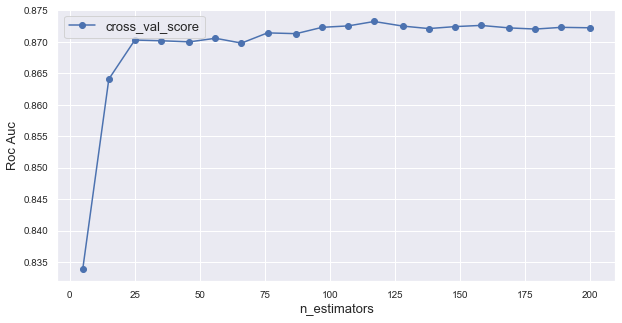

In [24]:
# n_estimators = [int(x) for x in np.linspace(start = 5, stop = 200, num = 20)]
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 200, num = 20)]

scores = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1,random_state=0)
    pipeline0 = Pipeline([('sm',sm),('rf',rf)])
    scores.append(generate_parameter_score(pipeline0,X_train[rf_features]))

plot_parameter_scores(n_estimators,'n_estimators',scores)

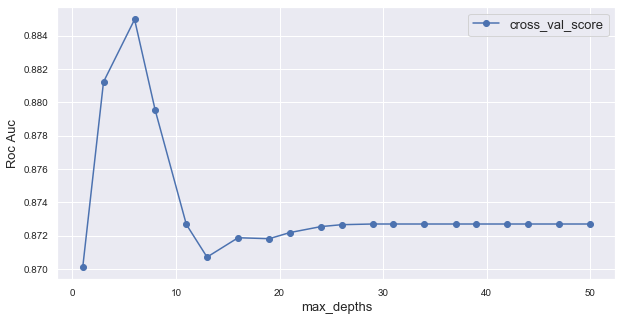

In [25]:
max_depths = [int(x) for x in np.linspace(start = 1, stop = 50, num = 20)]
# max_depths = [int(x) for x in np.linspace(10, 50, num = 10)]

scores = []
for depth in max_depths:
    rf = RandomForestClassifier(max_depth=depth, n_jobs=-1,random_state=0)
    pipeline0 = Pipeline([('sm',sm),('rf',rf)])
    scores.append(generate_parameter_score(pipeline0,X_train[rf_features]))

plot_parameter_scores(max_depths,'max_depths',scores)

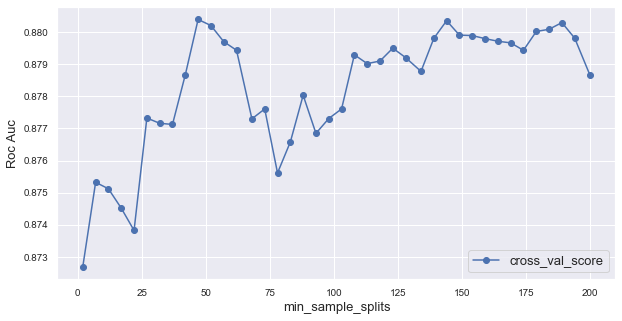

In [26]:
min_samples_splits = [int(x) for x in np.linspace(start = 2, stop = 200, num = 40)]
scores = []
for split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=split, n_jobs=-1,random_state=0)
    pipeline0 = Pipeline([('sm',sm),('rf',rf)])
    scores.append(generate_parameter_score(pipeline0,X_train[rf_features]))

plot_parameter_scores(min_samples_splits,'min_sample_splits',scores)

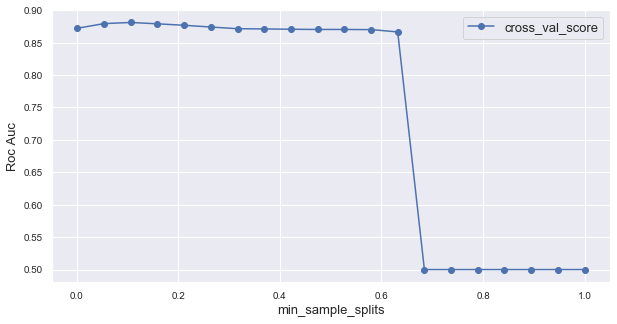

In [27]:
min_samples_splits = np.linspace(0.001, 1, 20, endpoint=True)
scores = []
for split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=split, n_jobs=-1,random_state=0)
    pipeline0 = Pipeline([('sm',sm),('rf',rf)])
    scores.append(generate_parameter_score(pipeline0,X_train[rf_features]))

plot_parameter_scores(min_samples_splits,'min_sample_splits',scores)

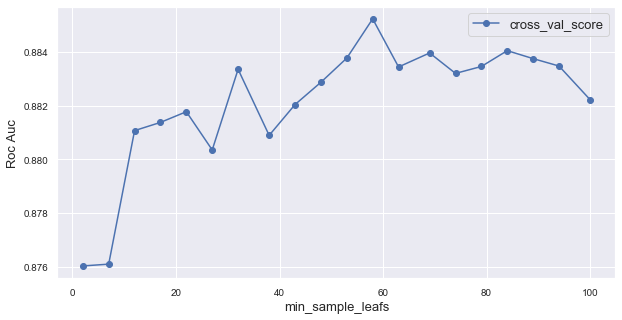

In [28]:
# min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
min_samples_leafs = [int(x) for x in np.linspace(start = 2, stop = 100, num = 20)] 
scores = []
for leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=leaf, n_jobs=-1,random_state=0)
    pipeline0 = Pipeline([('sm',sm),('rf',rf)])
    scores.append(generate_parameter_score(pipeline0,X_train[rf_features]))

plot_parameter_scores(min_samples_leafs,'min_sample_leafs',scores)

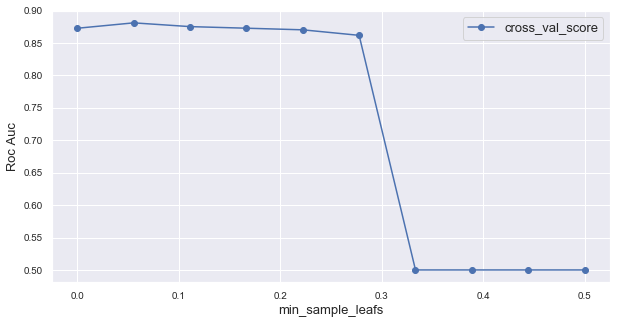

In [29]:
min_samples_leafs = np.linspace(0.0001, 0.5, 10, endpoint=True)
scores = []
for leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=leaf, n_jobs=-1,random_state=0)
    pipeline0 = Pipeline([('sm',sm),('rf',rf)])
    scores.append(generate_parameter_score(pipeline0,X_train[rf_features]))

plot_parameter_scores(min_samples_leafs,'min_sample_leafs',scores)

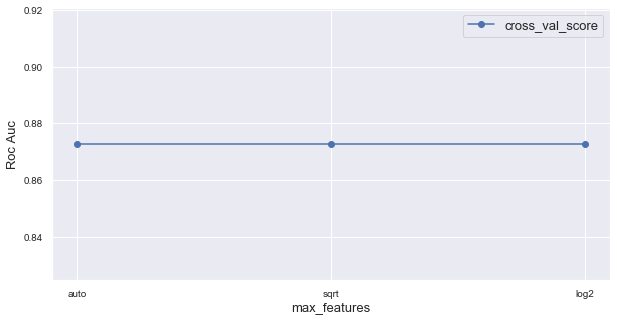

In [30]:
max_features = ['auto', 'sqrt','log2']
scores = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature, n_jobs=-1,random_state=0)
    pipeline0 = Pipeline([('sm',sm),('rf',rf)])
    scores.append(generate_parameter_score(pipeline0,X_train[rf_features]))

plot_parameter_scores(max_features,'max_features',scores)

In [24]:
best_rf = rf4.best_estimator_

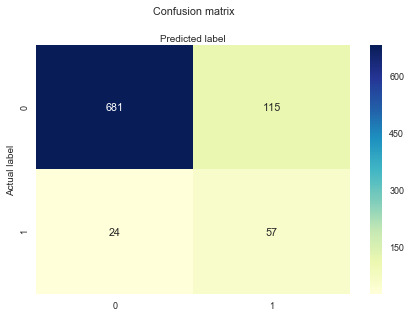

In [25]:
best_rf_test = fit_and_predict(best_rf, 'rf: Best on test', X_train[rf_features], y_train, X_test[rf_features], y_test)


In [26]:
baseline_rf_test = fit_and_predict(pipeline1, 'rf: Baseline on test', X_train, y_train, X_test, y_test)

In [27]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(best_clf,X):
    train_sizes = [int(x) for x in np.linspace(start = 100, stop = 2336, num = 30)]
    train_sizes, train_scores, validation_scores = learning_curve(estimator = best_clf, 
                                                                  X = X, 
                                                                  y = y_train_val, 
                                                                  train_sizes = train_sizes, 
                                                                  cv = 3, 
                                                                  scoring = 'roc_auc')
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error',marker='o')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error',marker='o')
    plt.ylabel('Roc Auc', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning Curves', fontsize = 14, y = 1.03)
    plt.legend()
    plt.ylim(0.4,1)

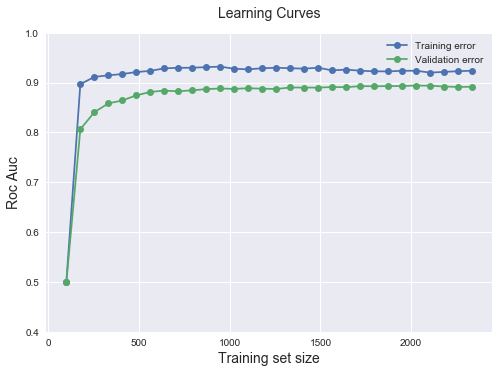

In [35]:
plot_learning_curve(best_rf[1],X_train_val[rf_features])

#### Attempt 2: XGBoost


In [28]:
xgb = XGBClassifier(random_state=0,n_jobs=-1)
pipeline1 = Pipeline([('sm', sm),('xgb1', xgb)])
xgb1 = fit_and_predict(pipeline1,'xgb: Baseline', X_train.values, y_train.values, X_val.values, y_val.values)

feature importance
Fasting Glucose        0.172057
Exercise               0.109651
Age                    0.072115
White                  0.070483
Alcohol Use_NaN        0.057501
Mexican American       0.056008
Gender                 0.054882
Black                  0.040792
Pesticide Use          0.040253
Hispanic               0.039256
Anemia                 0.037034
LDL                    0.033030
HDL_NaN                0.030908
Alcohol Use            0.025329
Insulin_NaN            0.018941
LDL_NaN                0.018779
HDL                    0.018198
diaBP                  0.017410
Asian                  0.016457
SysBP_NaN              0.014360
Insulin                0.010910
Other Race             0.010320
Waist Size             0.010238
sysBP                  0.009774
BMI                    0.007711
Leg Length             0.007606
BMI_NaN                0.000000
Fasting glucose_NaN    0.000000
DiaBP_NaN              0.000000
dtype: float32


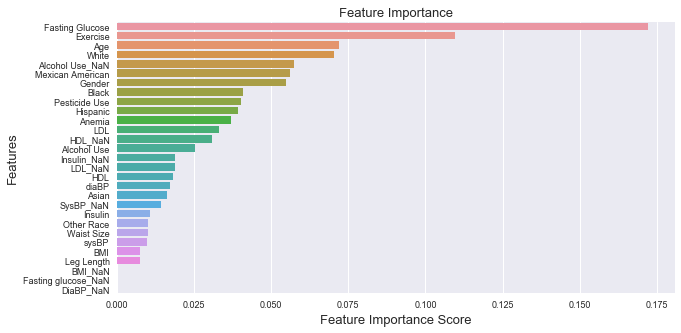

In [29]:
featimp = feature_importance(xgb1[1],X_names)

In [30]:
# highest roc_auc at threshold = 0.07
xgb = XGBClassifier(random_state=0)
thresholds = [0,0.007,0.01,0.015,0.02,0.03,0.04,0.05,0.07]
threshold = 0.07
sfm = SelectFromModel(xgb, threshold=threshold)
pipeline0 = Pipeline([('sm', sm), 
                      ('sfm', sfm),
                      ('xgb', xgb)])

xgb2 = fit_and_predict(pipeline0, 'xgb: Feature importance', X_train, y_train, X_val, y_val)

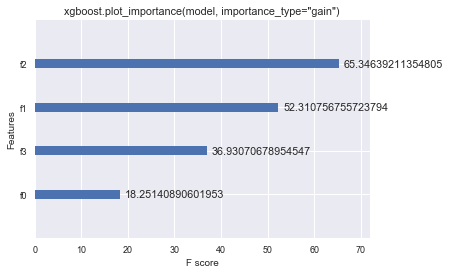

In [96]:
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl
xgboost.plot_importance(xgb2[2], importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

In [31]:
threshold = 0.04
sfm = SelectFromModel(RandomForestClassifier(random_state=0), threshold=threshold)
pipeline2 = Pipeline([('sm', sm), 
                      ('sfm', sfm),
                      ('rf', rf)])

rf2 = fit_and_predict(pipeline2, 'rf: Feature importance', X_train, y_train, X_val, y_val)

In [32]:
chosen_feature_indices = xgb2[1].get_support(indices=True)
xgb_features = [X_names[i] for i in chosen_feature_indices]
xgb_features

['Age', 'Exercise', 'Fasting Glucose', 'White']

In [33]:
xgb_grid =  {'xgb1__min_child_weight': [int(x) for x in np.linspace(start = 1, stop = 100, num = 20)],
             'xgb1__gamma': [0.5, 1, 1.5, 2, 5],
             'xgb1__subsample': np.linspace(0.1, 1, 10, endpoint=True),
             'xgb1__colsample_bytree': np.linspace(0.1, 1, 10, endpoint=True),
             'xgb1__max_depth': [int(x) for x in np.linspace(start = 1, stop = 100, num = 20)]}


xgb5 = hyperparameters(pipeline1,'random',xgb_grid) 
xgb5 = fit_and_predict(xgb5, 'xgb: Feature importance + random search 1', X_train[xgb_features].values, y_train.values, X_val[xgb_features].values, y_val.values)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.2s finished


In [34]:
xgb_grid =  {'xgb1__min_child_weight': [1, 5, 10],
             'xgb1__gamma': [0.5, 1, 1.5, 2, 5],
             'xgb1__subsample': [0.6, 0.8, 1.0],
             'xgb1__colsample_bytree': [0.6, 0.8, 1.0],
             'xgb1__max_depth': [3, 4, 5]}

xgb6 = hyperparameters(pipeline1,'random',xgb_grid) 
xgb6 = fit_and_predict(xgb6, 'xgb: Feature importance + random search 2', X_train[xgb_features].values, y_train.values, X_val[xgb_features].values, y_val.values)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.3s finished


In [35]:
best_xgb = xgb5.best_estimator_

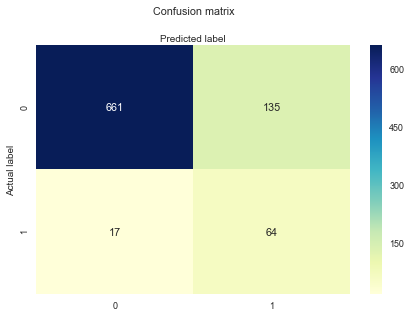

In [36]:
best_xgb_test = fit_and_predict(xgb5.best_estimator_, 'xgb: Best on test', X_train[xgb_features].values, y_train.values, X_test[xgb_features].values, y_test.values)


In [37]:
baseline_xgb_test = fit_and_predict(pipeline1, 'xgb: Baseline on test', X_train.values, y_train.values, X_test.values, y_test.values)


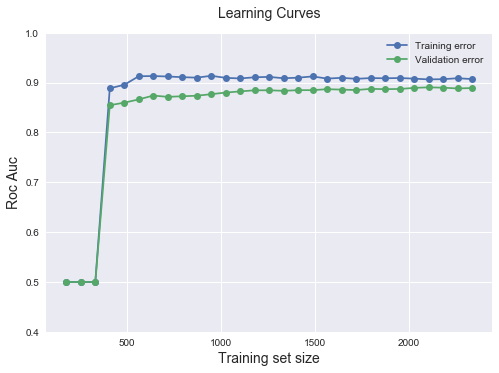

In [45]:
plot_learning_curve(best_xgb,X_train_val[xgb_features].values)

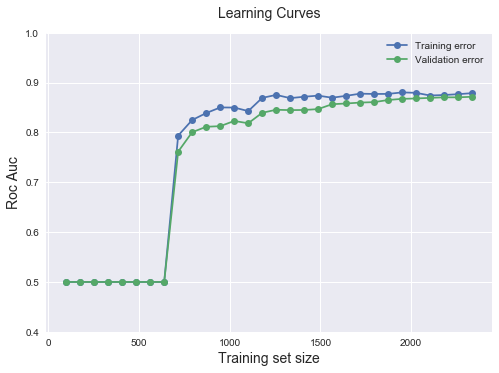

In [46]:
plot_learning_curve(best_xgb[1],X_train_val[xgb_features].values)

## FEATURE SELECTION

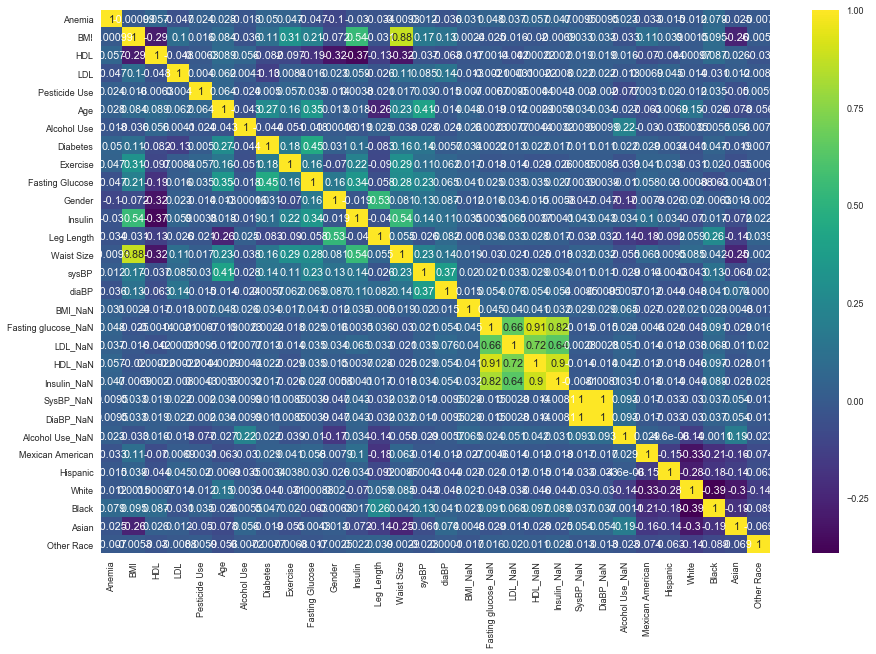

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(data= df.corr(), annot=True, cmap='viridis')

Text(0.5,1,'Feature correlation with diabetes')

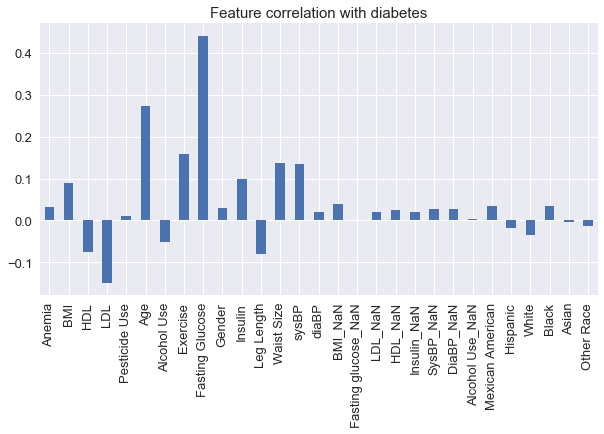

In [39]:
X_train.corrwith(y_train).plot.bar(figsize = (10, 5), fontsize = 13,grid = True)
plt.title('Feature correlation with diabetes',fontsize = 15)

### PCA

In [40]:
pca = PCA(0.9)
principal_components = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data = principal_components)
principal_df.shape

(2804, 13)

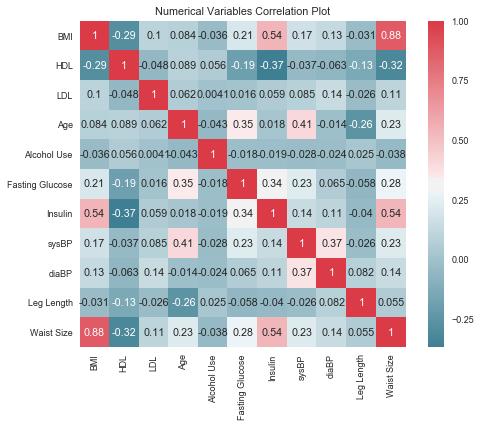

In [41]:
corr_df = df[numerical_variables]
cor = corr_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Numerical Variables Correlation Plot")

sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

plt.show()

In [42]:
numerical_variables_1 = [v for v in numerical_variables if v!= 'BMI']

In [43]:
numerical_variables_1

['HDL',
 'LDL',
 'Age',
 'Alcohol Use',
 'Fasting Glucose',
 'Insulin',
 'sysBP',
 'diaBP',
 'Leg Length',
 'Waist Size']

### Kendall

relevant
Diabetes           1.000000
Fasting Glucose    0.271995
Age                0.225036
Waist Size         0.131785
sysBP              0.110581
LDL                0.104014
Name: Diabetes, dtype: float64

irrelevant
['HDL', 'Alcohol Use', 'Insulin', 'diaBP', 'Leg Length']

kendall pick these features:
['Fasting Glucose', 'Age', 'Waist Size', 'sysBP', 'LDL']


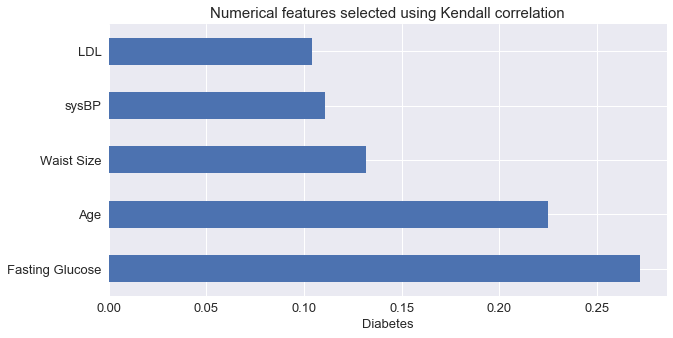

In [44]:
# kendall - filter method
# between numerical variables and y 

correlation_coefficient = 0.1
def feature_target_correlation(df,threshold):
    cor = df[numerical_variables_1+['Diabetes']].corr(method='kendall')
    cor_target = abs(cor['Diabetes'])
    irrelevant_features = cor_target[cor_target<threshold]
    relevant_features = cor_target[cor_target>threshold].sort_values(ascending=False)
    relevant_features[1:].plot(figsize = (10, 5),kind='barh',fontsize=13)
    plt.title('Numerical features selected using Kendall correlation',fontsize = 15)
    plt.xlabel('Diabetes',fontsize=13)
    print('relevant')
    print(relevant_features)
    print()
    print('irrelevant')
    print(list(irrelevant_features.index))

    return list(relevant_features.index)[1:]

kendall_features = feature_target_correlation(df,correlation_coefficient)
print()
print('kendall pick these features:')
print(kendall_features)

### CHI2

In [45]:
# Check relationship with y: chi-square test
def chi2():
    remove_list_chi = []
    chi_features = []
    for categorical_variable in categorical_variables:
        csq = chi2_contingency(pd.crosstab(y, df[categorical_variable]))
        p_value = csq[1]
        if p_value>0.05: 
            print(categorical_variable)
            print("P-value: ", p_value)
            remove_list_chi.append(categorical_variable)
        else: pass
    print(remove_list_chi)
    for v in categorical_variables:
        if v not in remove_list_chi:
            chi_features.append(v)
    return chi_features

In [46]:
chi_features = chi2()

Mexican American
P-value:  0.06691535191841347
Hispanic
P-value:  0.8867136521737536
Asian
P-value:  0.24529031953658043
Other Race
P-value:  0.7207394138461873
Fasting glucose_NaN
P-value:  0.9832368041720183
LDL_NaN
P-value:  0.45630005954196984
HDL_NaN
P-value:  0.17518283388635306
Insulin_NaN
P-value:  0.3022149103320376
SysBP_NaN
P-value:  0.5277624636971954
DiaBP_NaN
P-value:  0.5277624636971954
Alcohol Use_NaN
P-value:  0.16571702032611946
Pesticide Use
P-value:  0.8045789963264002
['Mexican American', 'Hispanic', 'Asian', 'Other Race', 'Fasting glucose_NaN', 'LDL_NaN', 'HDL_NaN', 'Insulin_NaN', 'SysBP_NaN', 'DiaBP_NaN', 'Alcohol Use_NaN', 'Pesticide Use']


In [47]:
print(chi_features)

['White', 'Black', 'BMI_NaN', 'Gender', 'Exercise', 'Anemia']


In [48]:
chi_kendall_features = chi_features + kendall_features
chi_kendall_features

['White',
 'Black',
 'BMI_NaN',
 'Gender',
 'Exercise',
 'Anemia',
 'Fasting Glucose',
 'Age',
 'Waist Size',
 'sysBP',
 'LDL']

### ANOVA

In [49]:
# ANOVA for numerical features, pick the top 5 features
k_best = SelectKBest(f_classif, k=5)
k_best.fit_transform(X_train[numerical_variables_1], y_train)
k_best.pvalues_
p_values = pd.DataFrame({'Feature': X_train[numerical_variables_1].columns, 'p_value':k_best.pvalues_}).sort_values('p_value')
p_values.head(5)

Feature        p_value
4  Fasting Glucose  4.087135e-134
2              Age   6.178411e-49
1              LDL   1.952134e-15
9       Waist Size   3.412269e-13
6            sysBP   4.730123e-13

In [50]:
ANOVA_features = list(p_values['Feature'][:5])

In [51]:
chi_anova_features = chi_features + ANOVA_features
print(chi_anova_features)

['White', 'Black', 'BMI_NaN', 'Gender', 'Exercise', 'Anemia', 'Fasting Glucose', 'Age', 'LDL', 'Waist Size', 'sysBP']


### Backward Elimination

In [52]:
def backward_elimiation():
    cols = list(X_train.columns)
    pmax = 1
    while (len(cols)>0):
        p= []
        X_1 = X_train[cols]
        X_1 = sms.add_constant(X_1)
        model = sms.OLS(y_train,X_1).fit()
        p = pd.Series(model.pvalues.values[1:],index = cols)      
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax>0.05):
            cols.remove(feature_with_p_max)
        else:
            break
    selected_features_BE = cols
    return selected_features_BE

be_features = backward_elimiation()

be_features

['Anemia',
 'HDL',
 'LDL',
 'Age',
 'Alcohol Use',
 'Exercise',
 'Fasting Glucose',
 'Gender',
 'Insulin',
 'Fasting glucose_NaN',
 'HDL_NaN',
 'Mexican American',
 'Black',
 'Asian']

### Random forest feature importance 

In [53]:
rf_features

['LDL', 'Age', 'Exercise', 'Fasting Glucose', 'Waist Size', 'sysBP']

### XGBoost feature importance 

In [54]:
xgb_features

['Age', 'Exercise', 'Fasting Glucose', 'White']

### VIF: check collinearity

In [55]:
# check for feature collinearity 
# When measuring, if the two features have a VIF of 1, then they are not collinear of each other 
# As the numbers increases, the higher they are correlated with each other. 
# If VIF returns a number greater than 5, then those two features should be reduced to one using PCA.

from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    Remaining_variables = X.columns[variables].tolist()
    return Remaining_variables

vif_features = calculate_vif(X_train)
print(vif_features)

dropping 'SysBP_NaN' at index: 20
dropping 'HDL_NaN' at index: 18
dropping 'Waist Size' at index: 12
['Anemia', 'BMI', 'HDL', 'LDL', 'Pesticide Use', 'Age', 'Alcohol Use', 'Exercise', 'Fasting Glucose', 'Gender', 'Insulin', 'Leg Length', 'sysBP', 'diaBP', 'BMI_NaN', 'Fasting glucose_NaN', 'LDL_NaN', 'Insulin_NaN', 'DiaBP_NaN', 'Alcohol Use_NaN', 'Mexican American', 'Hispanic', 'White', 'Black', 'Asian', 'Other Race']


### Recursive feature elimination: this needs to be done with model training

In [56]:
# This needs to be used with model training, not separately 
from sklearn.feature_selection import RFE

num_features = 15
    
def recursive_feature_elimination(rfe):
    chosen_vars = []
    for i in range(len(rfe.support_)):
        if rfe.support_[i] == True:
            chosen_vars.append(X_train.columns[i])
    print(len(chosen_vars), "features are chosen through RFE and they are", chosen_vars)
    return chosen_vars

In [57]:
feature_choices = {'chi_anova_features': chi_anova_features,
                   'chi_kendall_features': chi_kendall_features,
                   'be_features': be_features,
                   'rf_features': rf_features,
                   'vif_features': vif_features,
                   'xgb_features':xgb_features}

#### Attempt 3:  Logistic Regression
* A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression. 

In [58]:
# logreg: default L2
logreg = LogisticRegression(random_state=0,n_jobs=-1)
pipeline1 = Pipeline([('sm', sm), ('logreg', logreg)])

lr1 = fit_and_predict(pipeline1, 'lr: Baseline',X_train, y_train, X_val, y_val)

In [59]:
# lasso
logreg = LogisticRegression(penalty='l1',n_jobs =-1,solver='liblinear',random_state=0)
pipeline2 = Pipeline([('sm', sm), ('logreg', logreg)])
lr2 = fit_and_predict(pipeline2, 'lr: lasso',X_train, y_train, X_val, y_val)

In [60]:
# logreg with different feature selection
for name, features in feature_choices.items():
    lr = fit_and_predict(pipeline1, 'lr: '+' '+name,X_train[features],y_train, X_val[features], y_val)

In [61]:
# logreg feature selection cont.
# logreg + RFE: number of feature = 5 gives the best result
feature_num = 5
logreg = LogisticRegression(n_jobs=-1)
rfe_logreg = RFE(logreg,feature_num)
pipeline3 = Pipeline([('sm', sm), ('rfe_logreg', rfe_logreg)])
lr_rfe = fit_and_predict(pipeline3, 'lr: RFE '+str(feature_num), X_train,y_train, X_val, y_val)
lr_rfe_features = recursive_feature_elimination(lr_rfe[1])

5 features are chosen through RFE and they are ['Anemia', 'Age', 'Exercise', 'Fasting Glucose', 'Other Race']


In [65]:
# logreg + xgb features gives the best result
# use this for grid search
grid1 = {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
lr3 = hyperparameters(pipeline1, 'gridsearch', grid1)
lr3 = fit_and_predict(lr3,'lr: xgb features + grid search 1',X_train[xgb_features], y_train, X_val[xgb_features], y_val)

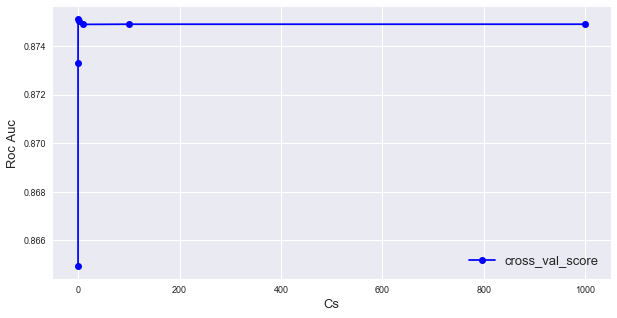

In [63]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
scores = []
for C in Cs:
    logreg = LogisticRegression(C=C,random_state=0,penalty='l2',n_jobs=-1)
    pipeline0 = Pipeline([('sm',sm),('logreg', logreg)])
    scores.append(generate_parameter_score(pipeline0,X_train[xgb_features]))

plot_parameter_scores(Cs,'Cs',scores)

In [66]:
best_lr = lr3.best_estimator_

In [67]:
lr3.best_params_

{'logreg__C': 1}

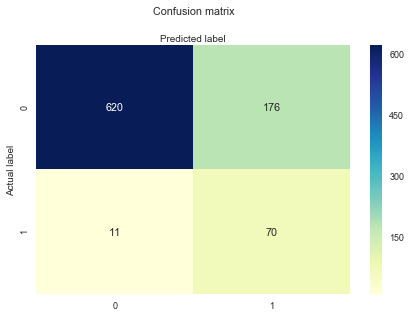

In [68]:
best_lr_on_test = fit_and_predict(best_lr,'lr: Best on test',X_train[xgb_features], y_train, X_test[xgb_features], y_test)

In [69]:
baseline_lr_test = fit_and_predict(pipeline1, 'lr: Baseline on test', X_train, y_train, X_test, y_test)

In [70]:
plot_learning_curve(best_lr,X_train_val[xgb_features])

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6

#### Attempt 4: knn



In [132]:
knn = KNeighborsClassifier(n_jobs=-1)
pipeline1 = Pipeline([('sm', sm),('knn', knn)])
knn1 = fit_and_predict(pipeline1,'knn: Baseline', X_train, y_train, X_val, y_val)

In [133]:
# knn with different feature selection, knn has no RFE
for name, features in feature_choices.items():
    print(name)
    knn = fit_and_predict(pipeline1, 'knn: '+name,X_train[features],y_train, X_val[features], y_val)

chi_anova_features
chi_kendall_features
be_features
rf_features
vif_features
xgb_features


* small k: low bias, high variance; large k: high bias, low variance

In [134]:
n_neighbors =  [int(x) for x in np.linspace(start = 1, stop = 300, num = 30)]
scores = []
for n_neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbor,n_jobs=-1)
    pipeline0 = Pipeline([('sm',sm),('knn', knn)])
    scores.append(generate_parameter_score(pipeline0,X_train[chi_kendall_features]))

plot_parameter_scores(n_neighbors,'n_neighbors',scores)

KeyboardInterrupt: 

In [138]:
# be_features are the best so far
knn_grid =  {'knn__metric': ['euclidean','manhattan'],
             'knn__weights': ['uniform','distance'],
             'knn__n_neighbors': [int(x) for x in np.linspace(start = 2, stop = 300, num = 20)]}

knn2 = hyperparameters(pipeline1, 'gridsearch', knn_grid)
knn2 = fit_and_predict(knn2,'knn: be_features + grid search 300',X_train[be_features], y_train, X_val[be_features], y_val)


In [139]:
knn2.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 300,
 'knn__weights': 'uniform'}

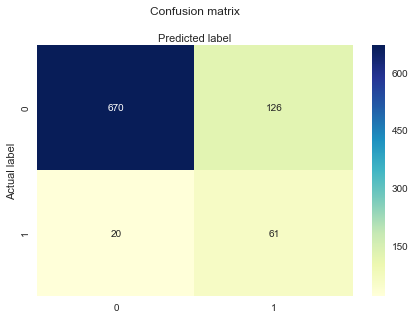

In [140]:
best_knn = knn2.best_estimator_
best_knn_on_test = fit_and_predict(best_knn,'knn: Best on test',X_train[be_features], y_train, X_test[be_features], y_test)

In [141]:
baseline_knn_test = fit_and_predict(pipeline1, 'knn: Baseline on test', X_train, y_train, X_test, y_test)

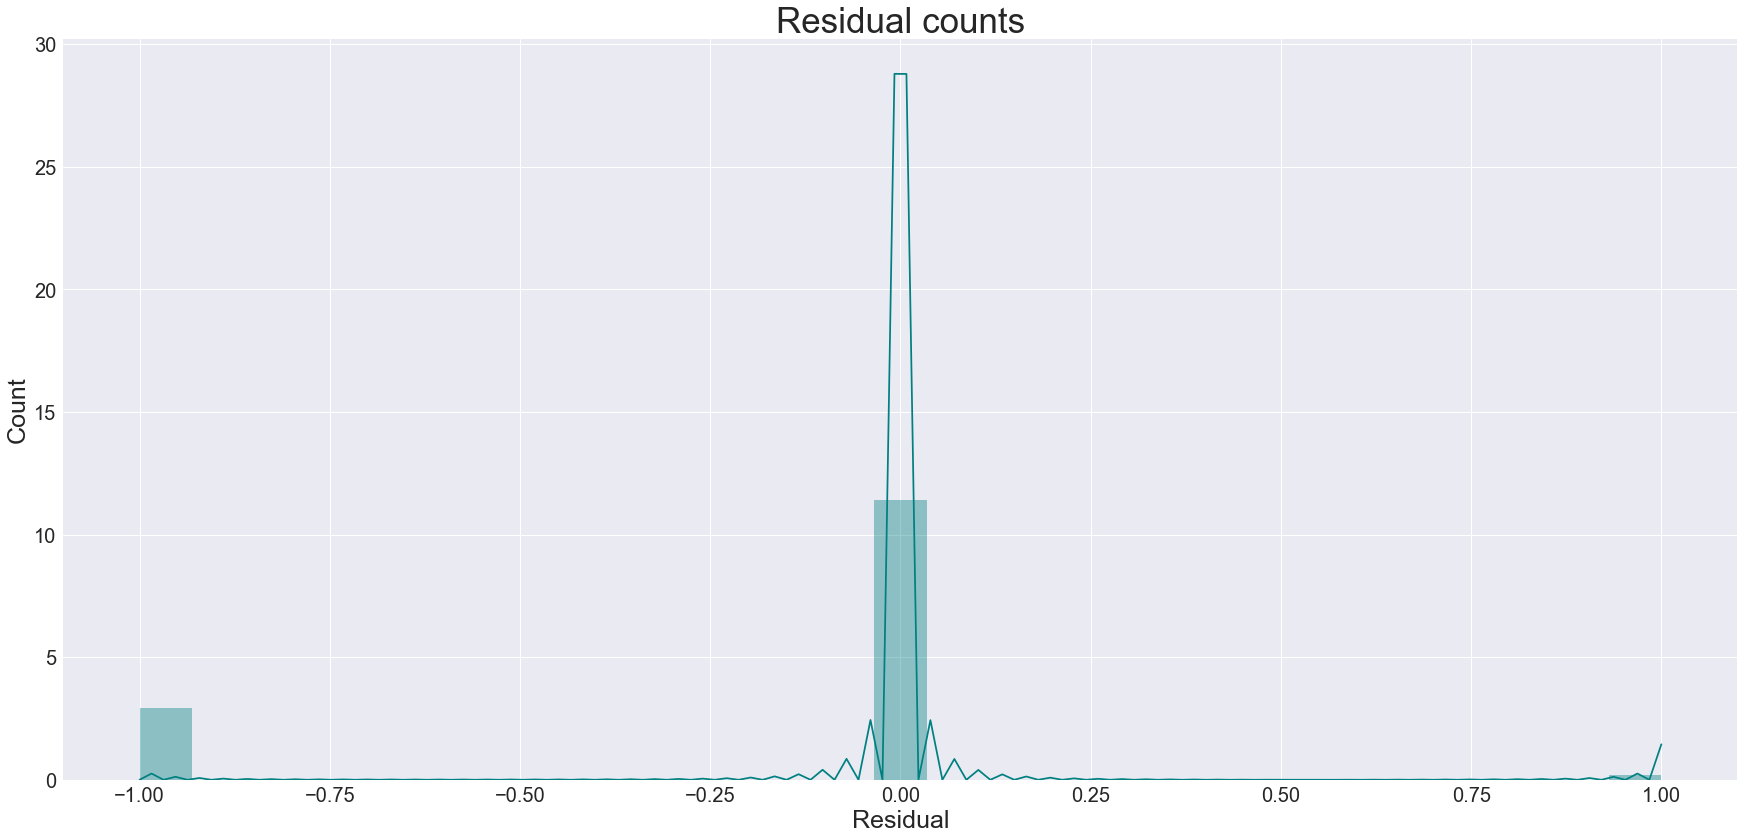

RMSE:
0.46299801379203626


In [143]:
from sklearn import neighbors
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
best_knn_on_test.fit(X_train, y_train)

predicted = best_knn_on_test.predict(X_test)
residual = y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE:')
print(rmse)

In [ ]:
train_sizes = [int(x) for x in np.linspace(start = 300, stop = 2336, num = 30)]
train_sizes, train_scores, validation_scores = learning_curve(estimator = best_knn, 
                                                              X = X_train_val[be_features], 
                                                              y = y_train_val, 
                                                              train_sizes = train_sizes, 
                                                              cv = 3, 
                                                              scoring = 'roc_auc')
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error',marker='o')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error',marker='o')
plt.ylabel('Roc Auc', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning Curves', fontsize = 14, y = 1.03)
plt.legend()
plt.ylim(0.4,1)

#### Attempt 5: SVM - SVC

In [74]:
svc = SVC(probability=True)
pipeline1 = Pipeline([('sm', sm),('svc', svc)])
svc1 = fit_and_predict(pipeline1,'svc: Baseline', X_train, y_train, X_val, y_val)

In [75]:
# svc feature selection
for name, features in feature_choices.items():
    print(name)
    svc = fit_and_predict(pipeline1, 'svc: '+name,X_train[features],y_train, X_val[features], y_val)

chi_anova_features
chi_kendall_features
be_features
rf_features
vif_features
xgb_features


In [76]:
# rfe SVC
# for num in [3,5,7,9,13,15]:
feature_num=9
svc = SVC(probability=True,kernel='linear')
rfe_svc = RFE(svc,feature_num)
pipeline0 = Pipeline([('sm', sm), ('rfe_svc', rfe_svc)])
svc_rfe = fit_and_predict(pipeline0, 'svc: RFE'+str(feature_num), X_train, y_train, X_val, y_val)
svc_rfe_features = recursive_feature_elimination(svc_rfe[1])

9 features are chosen through RFE and they are ['Anemia', 'LDL', 'Pesticide Use', 'Age', 'Exercise', 'Fasting Glucose', 'Hispanic', 'White', 'Other Race']


In [77]:
# SVC + xgb_features is the best 
Cs = [0.001, 0.01, 0.1, 1, 10,100]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']
svc_grid1 =  {'svc__C': Cs,
             'svc__gamma': gammas,
             'svc__kernel': kernels}

svc2 = hyperparameters(pipeline1,'random',svc_grid1)
svc2 = fit_and_predict(svc2,'svc: xgb_features + random search 1',X_train[xgb_features], y_train, X_val[xgb_features], y_val)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   26.4s finished


In [78]:
svc2.best_params_

{'svc__C': 0.001, 'svc__gamma': 1, 'svc__kernel': 'rbf'}

In [79]:
Cs = [0.001, 0.01, 0.1, 1, 10,100]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear']
svc_grid2 =  {'svc__C': Cs,
             'svc__gamma': gammas,
             'svc__kernel': kernels}

svc3 = hyperparameters(pipeline1,'random',svc_grid2)
svc3 = fit_and_predict(svc3,'svc: xgb_features + random search 2',X_train[xgb_features], y_train, X_val[xgb_features], y_val)
                                                                

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   30.7s finished


In [ ]:
svc3.best_params_

In [ ]:
# # no change with C >= 0.01
# Cs =  [0.001, 0.01, 0.1, 1, 10,100,1000]
# scores = []
# for C in Cs:
#     svc = SVC(probability=True,kernel='linear',C=C)
#     pipeline0 = Pipeline([('sm',sm),('svc', svc)])
#     scores.append(generate_parameter_score(pipeline0,X_train[xgb_features]))

# plot_parameter_scores(Cs,'Cs',scores)

In [ ]:
# gammas = [0.001, 0.01, 0.1, 1]
# scores = []
# for gamma in gammas:
#     svc = SVC(probability=True,kernel='linear',gamma=gamma)
#     pipeline0 = Pipeline([('sm',sm),('svc', svc)])
#     scores.append(generate_parameter_score(pipeline0,X_train[xgb_features]))

# plot_parameter_scores(gammas,'gammas',scores)

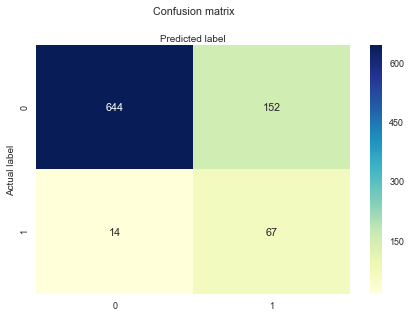

In [80]:
# ????
# default svc with xgb features is the best
best_svc = fit_and_predict(pipeline1,'svc: Best on test', X_train[xgb_features], y_train, X_test[xgb_features], y_test)

In [81]:
baseline_svc_test = fit_and_predict(pipeline1, 'svc: Baseline on test', X_train, y_train, X_test, y_test)

## MODEL SUMMARY

In [82]:
results = model_results.set_index('Name')
pd.set_option('display.max_rows', None)
results = results.sort_values(by=['Roc Auc'],ascending=False)
results

Accuracy    Recall  Precision  \
Name                                                                       
rf: Feature importance + random search 1   0.878745  0.424000   0.803030   
svc: xgb_features                          0.853067  0.374150   0.833333   
xgb: Feature importance                    0.900143  0.481132   0.772727   
xgb: Feature importance + random search 2  0.857347  0.380282   0.818182   
xgb: Feature importance + random search 1  0.857347  0.380282   0.818182   
rf: Feature importance + random search 2   0.868759  0.401515   0.803030   
svc: xgb_features + random search 2        0.824536  0.331361   0.848485   
lr: xgb features + grid search 1           0.815977  0.320000   0.848485   
lr:  xgb_features                          0.815977  0.320000   0.848485   
lr: xgb features + grid search 1           0.815977  0.320000   0.848485   
svc: chi_kendall_features                  0.861626  0.385185   0.787879   
svc: chi_anova_features                    0.861626  0.385185   0.787879   
svc: be_features                           0.858773  0.379562   0.787879   
lr: RFE 5                                  0.820257  0.323529   0.833333   
knn: be_features                           0.841655  0.350993   0.803030   
lr:  chi_kendall_features                  0.828816  0.333333   0.818182   
lr:  chi_anova_features                    0.828816  0.333333   0.818182   
lr: Best on test                           0.786773  0.284553   0.864198   
lr: Baseline on test                       0.822121  0.318841   0.814815   
svc: Best on test                          0.810718  0.305936   0.827160   
lr:  be_features                           0.828816  0.331250   0.803030   
lr:  rf_features                           0.828816  0.331250   0.803030   
lr: lasso                                  0.827389  0.329193   0.803030   
lr: Baseline                               0.827389  0.329193   0.803030   
svc: RFE9                                  0.825963  0.327160   0.803030   
lr:  vif_features                          0.825963  0.327160   0.803030   
svc: xgb_features + random search 1        0.734665  0.250000   0.909091   
knn: chi_anova_features                    0.843081  0.349315   0.772727   
knn: chi_kendall_features                  0.843081  0.349315   0.772727   
xgb: Best on test                          0.826682  0.321608   0.790123   
svc: Baseline                              0.851641  0.360294   0.742424   
svc: Baseline on test                      0.851767  0.355030   0.740741   
svc: rf_features                           0.848787  0.355072   0.742424   
knn: xgb_features                          0.834522  0.333333   0.757576   
svc: vif_features                          0.854494  0.363636   0.727273   
knn: vif_features                          0.825963  0.320513   0.757576   
rf: Feature importance                     0.920114  0.567568   0.636364   
rf: Feature importance                     0.920114  0.567568   0.636364   
knn: rf_features                           0.854494  0.361538   0.712121   
rf: Best on test                           0.841505  0.331395   0.703704   
xgb: Baseline                              0.915835  0.547945   0.606061   
knn: Baseline                              0.817404  0.301282   0.712121   
xgb: Baseline on test                      0.909920  0.510870   0.580247   
rf: Baseline                               0.925820  0.640000   0.484848   
rf: Baseline on test                       0.904219  0.477612   0.395062   

                                                 F1   Roc Auc  
Name                                                           
rf: Feature importance + random search 1   0.554974  0.844822  
svc: xgb_features                          0.516432  0.844226  
xgb: Feature importance                    0.593023  0.843057  
xgb: Feature importance + random search 2  0.519231  0.839800  
xgb: Feature importance + random search 1  0.519231  0.839800  
rf: Feature importance

In [83]:
best_models_names = ['rf: Best on test','xgb: Best on test','lr: Best on test','knn: Best on test','svc: Best on test']
baseline_models_names = ['rf: Baseline on test','xgb: Baseline on test ','lr: Baseline on test','knn: Baseline on test','svc: Baseline on test']
best_baseline_results = results.loc[results.index.intersection(best_models_names+baseline_models_names)]
best_results = results.loc[results.index.intersection(best_models_names)]
best_baseline_results

Accuracy    Recall  Precision        F1   Roc Auc
Name                                                                    
lr: Best on test       0.786773  0.284553   0.864198  0.428135  0.821546
lr: Baseline on test   0.822121  0.318841   0.814815  0.458333  0.818840
svc: Best on test      0.810718  0.305936   0.827160  0.446667  0.818103
xgb: Best on test      0.826682  0.321608   0.790123  0.457143  0.810263
svc: Baseline on test  0.851767  0.355030   0.740741  0.480000  0.801903
rf: Best on test       0.841505  0.331395   0.703704  0.450593  0.779616
rf: Baseline on test   0.904219  0.477612   0.395062  0.432432  0.675546

rf: Best on test
xgb: Best on test
lr: Best on test
svc: Best on test


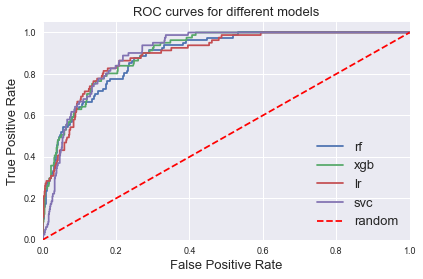

In [84]:
plt.figure()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=13)
plt.ylabel('True Positive Rate',fontsize=13)
plt.title('ROC curves for different models',fontsize=13)
legends = []

for clf,probability in best_clf_probabilities.items():
    print(clf)
    fpr, tpr, thresholds = roc_curve(y_test, probability)
    plt.plot(fpr, tpr)
    legends.append(clf[:-14])

plt.plot([0, 1], [0, 1],'r--')
legends.append('random')
plt.legend(legends,loc="lower right",fontsize=13)
plt.tight_layout()
plt.show()

In [85]:
best_results = best_results.sort_values(by=['Roc Auc'],ascending=False)
best_results

Accuracy    Recall  Precision        F1   Roc Auc
Name                                                                
lr: Best on test   0.786773  0.284553   0.864198  0.428135  0.821546
svc: Best on test  0.810718  0.305936   0.827160  0.446667  0.818103
xgb: Best on test  0.826682  0.321608   0.790123  0.457143  0.810263
rf: Best on test   0.841505  0.331395   0.703704  0.450593  0.779616

In [86]:
best_results = best_results.sort_values(by=['F1'],ascending=False)
best_results

Accuracy    Recall  Precision        F1   Roc Auc
Name                                                                
xgb: Best on test  0.826682  0.321608   0.790123  0.457143  0.810263
rf: Best on test   0.841505  0.331395   0.703704  0.450593  0.779616
svc: Best on test  0.810718  0.305936   0.827160  0.446667  0.818103
lr: Best on test   0.786773  0.284553   0.864198  0.428135  0.821546

In [87]:
best_results = best_results.sort_values(by=['Accuracy'],ascending=False)
best_results

Accuracy    Recall  Precision        F1   Roc Auc
Name                                                                
rf: Best on test   0.841505  0.331395   0.703704  0.450593  0.779616
xgb: Best on test  0.826682  0.321608   0.790123  0.457143  0.810263
svc: Best on test  0.810718  0.305936   0.827160  0.446667  0.818103
lr: Best on test   0.786773  0.284553   0.864198  0.428135  0.821546

In [88]:
best_results = best_results.sort_values(by=['Recall'],ascending=False)
best_results

Accuracy    Recall  Precision        F1   Roc Auc
Name                                                                
rf: Best on test   0.841505  0.331395   0.703704  0.450593  0.779616
xgb: Best on test  0.826682  0.321608   0.790123  0.457143  0.810263
svc: Best on test  0.810718  0.305936   0.827160  0.446667  0.818103
lr: Best on test   0.786773  0.284553   0.864198  0.428135  0.821546

In [89]:
best_results = best_results.sort_values(by=['Precision'],ascending=False)
best_results

Accuracy    Recall  Precision        F1   Roc Auc
Name                                                                
lr: Best on test   0.786773  0.284553   0.864198  0.428135  0.821546
svc: Best on test  0.810718  0.305936   0.827160  0.446667  0.818103
xgb: Best on test  0.826682  0.321608   0.790123  0.457143  0.810263
rf: Best on test   0.841505  0.331395   0.703704  0.450593  0.779616

## Ensemble

In [91]:
# best_models are models that go through: 1. feature selection 2. hyperparameter tuning 
#                                         3. fitted on train and evaluated on val and test

best_models  =  {'Random Forest':[best_rf,rf_features],
                 'XGBoost':[best_xgb,xgb_features],
                 'KNN':[best_knn,be_features],
                 'Logistic Regression':[best_lr,xgb_features],
                 'SVC':[best_svc,xgb_features]}

NameError: name 'best_knn' is not defined